___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
print("There are", len(X_train), "images in the training dataset")     
print("There are", len(X_test), "images in the test dataset") 

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

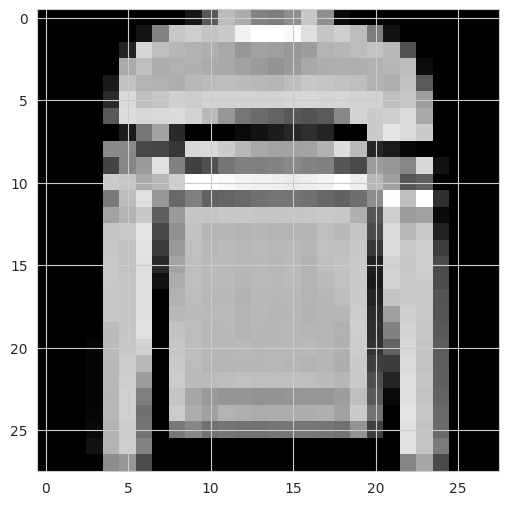

In [11]:
plt.imshow(X_train[5], cmap='gray');

In [7]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

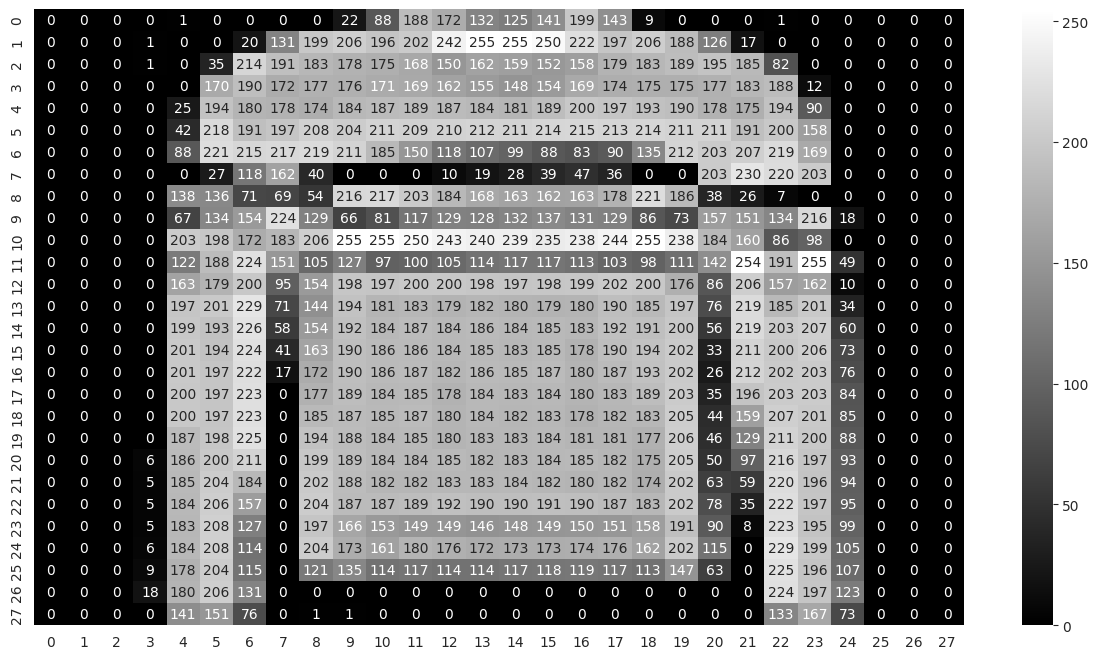

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_train[5], annot=True, cmap="gray", fmt=".3g");

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
y_train[5]

2

In [21]:
np.unique(y_train, return_counts=True)

# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [24]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
y_train[5]

2

In [25]:
classes[y_train[5]]

'Pullover'

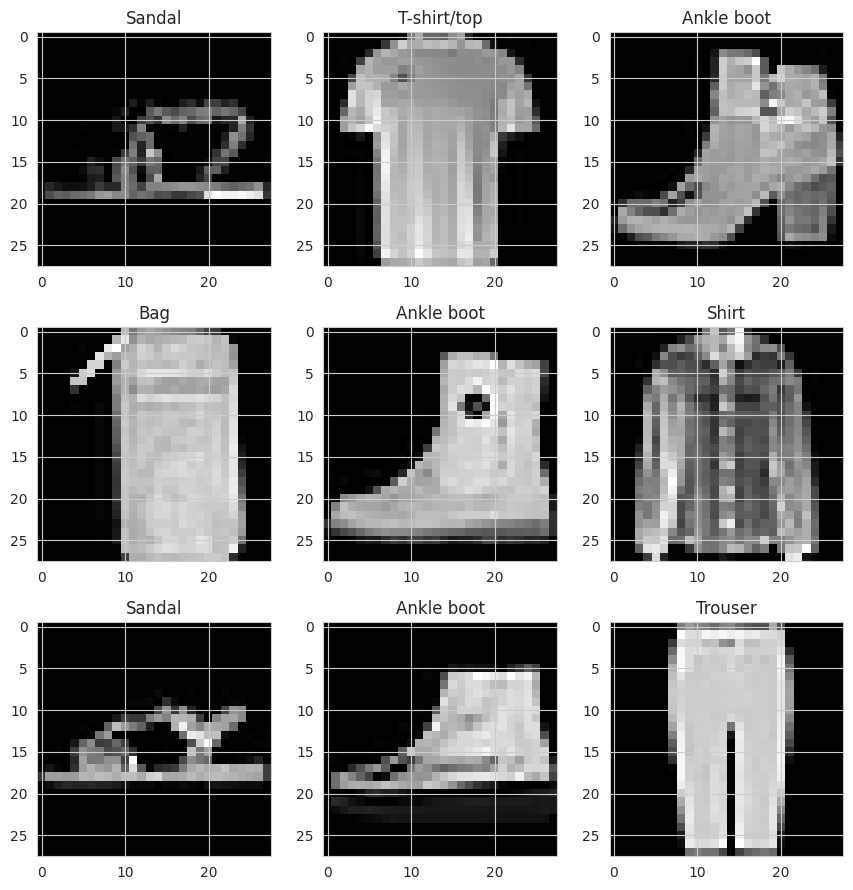

In [47]:
plt.figure(figsize=(9, 9))
for i in range(9):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(3, 3, i+1)
    plt.title(classes[y_train[rand_index]])
    plt.imshow(X_train[rand_index], cmap='gray')
    plt.tight_layout()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [33]:
X_train[5].min()

0

In [34]:
X_train[5].max()

255

In [35]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [36]:
X_train[9].min()

0.0

In [37]:
X_train[9].max()

1.0

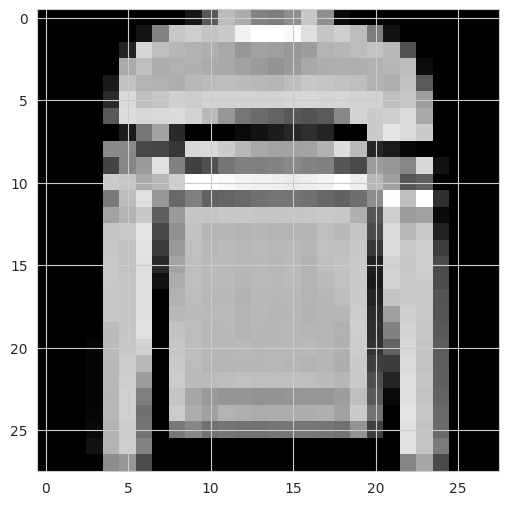

In [62]:
plt.imshow(X_train[5], cmap='gray');

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [50]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [49]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [51]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [52]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [53]:
y_train.shape

(60000,)

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [59]:
y_train[5]

2

In [60]:
Y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [81]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                 

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=4, restore_best_weights = True)

In [84]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4426 - accuracy: 0.8390 - val_loss: 0.3007 - val_accuracy: 0.8939
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2903 - accuracy: 0.8945 - val_loss: 0.2556 - val_accuracy: 0.9097
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2611 - accuracy: 0.9061 - val_loss: 0.2508 - val_accuracy: 0.9126
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2463 - accuracy: 0.9105 - val_loss: 0.2357 - val_accuracy: 0.9157
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2392 - accuracy: 0.9142 - val_loss: 0.2381 - val_accuracy: 0.9144
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2372 - accuracy: 0.9171 - val_loss: 0.2482 - val_accuracy: 0.9145
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2390 - accuracy: 0.9162 - val_loss: 0.2881 - val_ac

**TASK 7: Plot values of metrics you used in your model.**

In [85]:
model.metrics_names

['loss', 'accuracy']

In [87]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.443,0.839,0.301,0.894
1,0.290,0.894,0.256,0.910
2,0.261,0.906,0.251,0.913
3,0.246,0.911,0.236,0.916
4,0.239,0.914,0.238,0.914


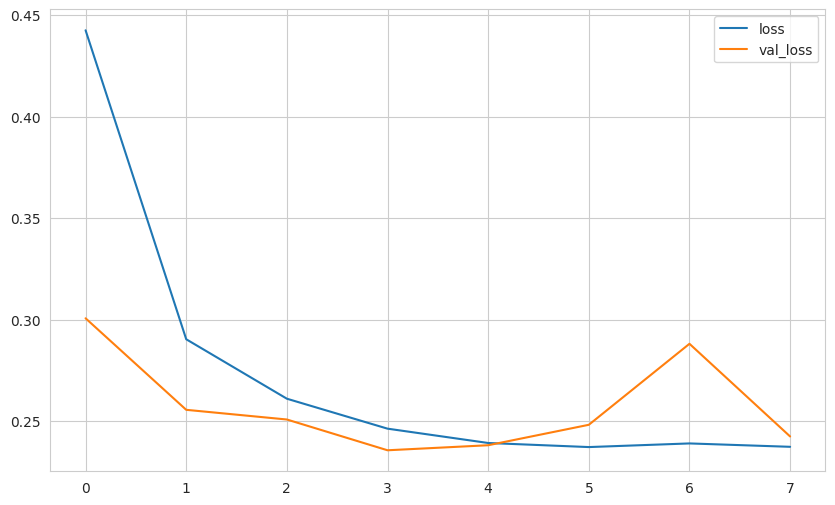

In [88]:
summary[["loss", "val_loss"]].plot();

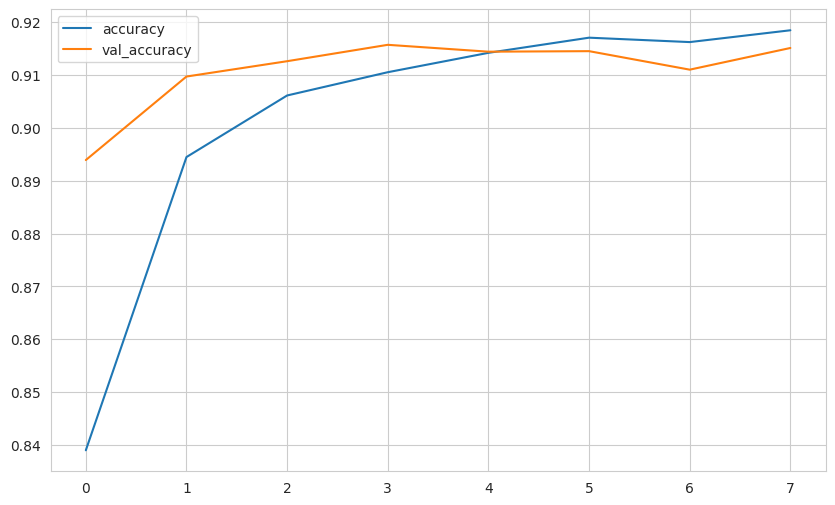

In [89]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2357 - accuracy: 0.9157


[0.23565341532230377, 0.9157000184059143]

In [92]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23565341532230377
Test accuracy: 0.9157000184059143


In [93]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.00000059, 0.        ,
        0.99999666],
       [0.00003579, 0.        , 0.99981266, ..., 0.        , 0.00000001,
        0.        ],
       [0.00000009, 0.9999995 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000002, 0.        , 0.00000001, ..., 0.        , 1.        ,
        0.        ],
       [0.00000015, 0.9999981 , 0.        , ..., 0.        , 0.        ,
        0.00000001],
       [0.00024169, 0.0000048 , 0.00004746, ..., 0.00643041, 0.19406779,
        0.00090823]], dtype=float32)

In [94]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.93      0.88      0.91      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.78      0.71      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [96]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [97]:
print(confusion_matrix(y_test, y_pred))

[[891   1  11  12   2   0  74   0   9   0]
 [  1 985   0  10   0   0   2   0   2   0]
 [ 19   2 886   7  48   0  37   0   1   0]
 [ 24   5  15 882  40   0  34   0   0   0]
 [  1   0  45  11 893   0  50   0   0   0]
 [  0   0   0   0   0 987   0   7   2   4]
 [127   2  74  22  61   0 709   0   5   0]
 [  0   0   0   0   0   3   0 980   2  15]
 [  2   1   2   1   2   1   8   0 983   0]
 [  0   0   1   0   0   4   0  33   1 961]]


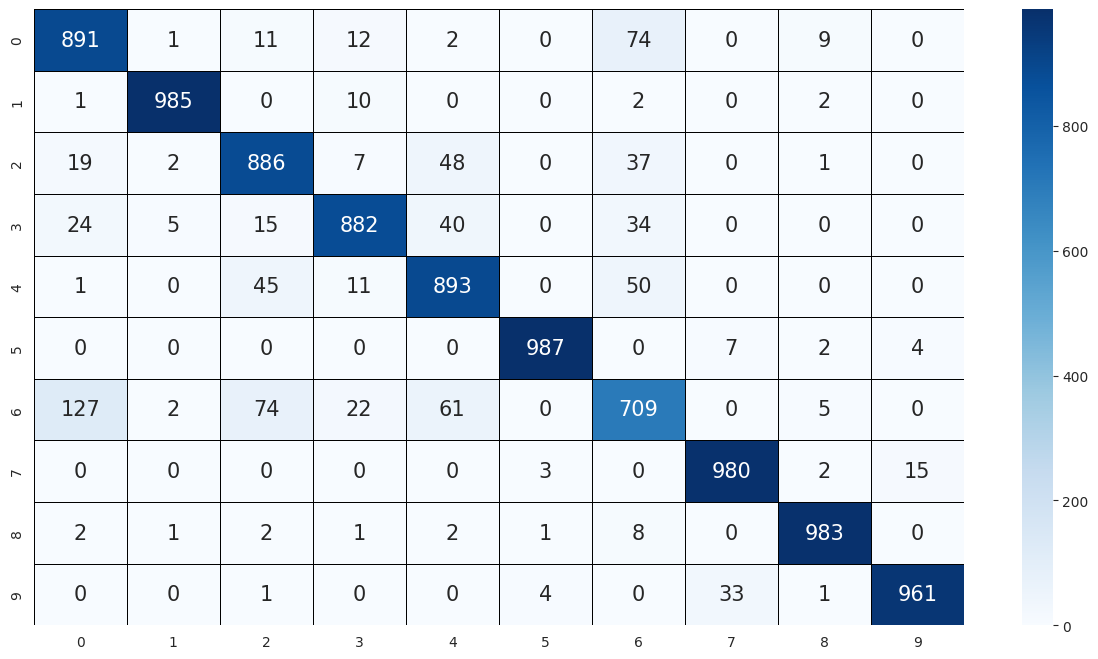

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

In [102]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

843

In [103]:
np.equal(y_test, y_pred).sum()

9157

## Prediction

In [104]:
my_image = X_test[40]

In [105]:
my_image.shape

(28, 28, 1)

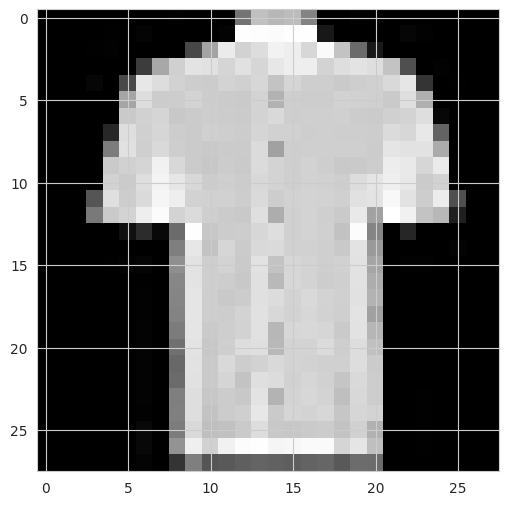

In [106]:
plt.imshow(my_image, cmap="gray");

In [107]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 108ms/step


In [108]:
image_prediction

array([[0.24043502, 0.00000006, 0.00011972, 0.00001039, 0.00080136,
        0.00000005, 0.75857586, 0.00000001, 0.00005751, 0.00000003]],
      dtype=float32)

In [109]:
np.argmax(image_prediction, axis=1)

array([6])

In [112]:
result = np.argmax(image_prediction, axis=1)
result

array([6])

In [113]:
classes[int(result)]

'Shirt'

In [114]:
y_test[40]

6

In [117]:
model.save("fashion_MNIST.h5")

## Load the Saved Model and Get Predictions

In [118]:
model = tf.keras.models.load_model('fashion_MNIST.h5')

In [119]:
my_image = X_test[245]

In [120]:
my_image.shape

(28, 28, 1)

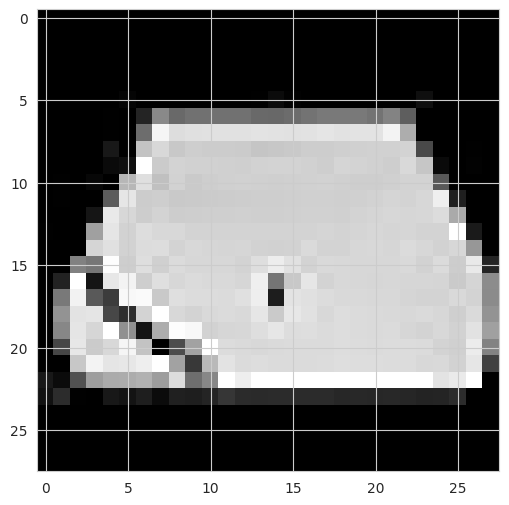

In [121]:
plt.imshow(my_image, cmap="gray");

In [124]:
np.expand_dims(my_image, axis=0).shape

(1, 28, 28, 1)

In [129]:
image_prediction = model.predict(np.expand_dims(my_image, axis=0))

1/1 [==============================] - 0s 30ms/step


In [130]:
image_prediction

array([[0.00000716, 0.00000003, 0.00000069, 0.00000001, 0.00000024,
        0.00000113, 0.00002424, 0.00000059, 0.99996567, 0.00000021]],
      dtype=float32)

In [131]:
np.argmax(image_prediction)

8

In [132]:
classes[np.argmax(image_prediction)]

'Bag'

In [133]:
y_test[245]

8

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___